In [1]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. \
import matplotlib.pyplot as plt


In [15]:
from google.colab import drive 
drive.mount('/content/mdrive')

Mounted at /content/mdrive


In [2]:
#!wget -c https://www.dropbox.com/s/ee5rwju5qnlrxb4/sign_data_2.zip

--2021-05-20 05:10:30--  https://www.dropbox.com/s/ee5rwju5qnlrxb4/sign_data_2.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ee5rwju5qnlrxb4/sign_data_2.zip [following]
--2021-05-20 05:10:31--  https://www.dropbox.com/s/raw/ee5rwju5qnlrxb4/sign_data_2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc071c7203bfc9287a0609adc494.dl.dropboxusercontent.com/cd/0/inline/BO1wjBGhyiLq-gpMhmCJlhi9evJguyWT4AUDiwS71xhvWogItrdQl02WcDWIQ5azx547RXPf9UfxdaFnr3RZa7mAzJwCocSKDfAEEKwttxCOEDTK1hQNyCkyQ8zMv4JyI7cBgLoJC5JMtDEq08nkhy-e/file# [following]
--2021-05-20 05:10:31--  https://uc071c7203bfc9287a0609adc494.dl.dropboxusercontent.com/cd/0/inline/BO1wjBGhyiLq-gpMhmCJlhi9evJguyWT4AUDiwS71xhvWogItrdQl02WcDWIQ5azx547RXPf9UfxdaFnr

In [3]:
#!unzip -uq sign_data_2.zip

In [16]:
train_dir ='/content/mdrive/MyDrive/sign_data_2/sign_data_2/train'
test_dir='/content/mdrive/MyDrive/sign_data_2/sign_data_2/test'

In [17]:
def preprocess(path):
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    thresh = cv2.erode(thresh, kernel, iterations=3)
    thresh = cv2.dilate(thresh, kernel, iterations=1)
    img = cv2.resize(thresh, (250, 75)) 
    return img

def create_train_data():
    training_data = []
    
    for folder in tqdm(os.listdir(train_dir)):
        
        real1 = os.path.join(train_dir+"/"+folder,'1')
        real2 = os.path.join(train_dir+"/"+folder,'2')
        forge = os.path.join(train_dir+"/"+folder,'forg')
        
        for r2 in tqdm(os.listdir(real2)):
            # loading one image at a time from r2 folder
            r2_path = os.path.join(real2,r2)
            
            try:
                r2_img = preprocess(r2_path) 
                
            except:
                print(r2_path) 
                
            i=0    
            for r1,f in zip(tqdm(os.listdir(real1)),tqdm(os.listdir(forge))):
                
                # this loop creates combinations of images from r1, forge folder with each image in r2 folder 
                i=i+1
                r1_path = os.path.join(real1,r1)
                f_path = os.path.join(forge,f)
                
                # loading image from r1 folder 
                try:
                    r1_img = preprocess(r1_path)
                except:
                    print(r1_path)
                    
                # loading image from forge folder
                try:
                    f_img = preprocess(f_path)
                except:
                    print(f_path)

                training_data.append([np.array(r1_img),np.array(r2_img),np.array(f_img)]) # appending to training data 

                if i==12:
                    break
    
    shuffle(training_data)
    training_data = np.array(training_data)
    np.save('signature_train_75_250.npy', training_data)        
    return training_data

In [19]:
train_data = create_train_data()

Streaming output truncated to the last 5000 lines.











 17%|█▋        | 2/12 [00:08<00:54,  5.49s/it]






























































  0%|          | 0/12 [00:00<?, ?it/s]































































  0%|          | 0/11 [00:00<?, ?it/s]






























































 67%|██████▋   | 8/12 [00:00<00:00, 79.28it/s]































































 67%|██████▋   | 8/12 [00:00<00:00, 46.55it/s]





























































 25%|██▌       | 3/12 [00:08<00:35,  3.97s/it]






























































  0%|          | 0/12 [00:00<?, ?it/s]































































  0%|          | 0/11 [00:00<?, ?it/s]






























































 75%|███████▌  | 9/12 [00:00<00:00, 89.80it/s]



















































In [20]:
train_data.shape

(3348, 3, 75, 250)

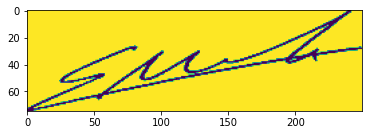

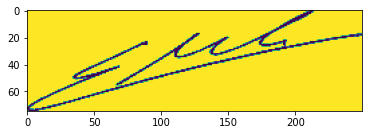

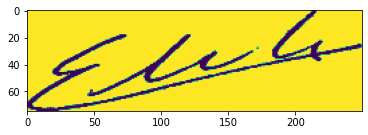

In [21]:
for i in [0,1,2]:
    plt.imshow(train_data[0][i])
    plt.show()

In [22]:
def create_test_data():
    testing_data = []
    
    for folder in tqdm(os.listdir(test_dir)):
        
        real1 = os.path.join(test_dir+"/"+folder,'1')
        real2 = os.path.join(test_dir+"/"+folder,'2')
        forge = os.path.join(test_dir+"/"+folder,'forg')
            
        i=0
        for r1,r2,f in zip(tqdm(os.listdir(real1)),tqdm(os.listdir(real2)),tqdm(os.listdir(forge))):
                
            i=i+1
            r1_path = os.path.join(real1,r1)
            r2_path = os.path.join(real2,r2)
            f_path = os.path.join(forge,f)
                
            kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
                
            try:
                r1_img = preprocess(r1_path)
            except:
                print(r1_path)
            
            try:
                r2_img = preprocess(r2_path) 
            except:
                print(r2_path)
                
            try:
                f_img = preprocess(f_path)
            except:
                print(f_path)
                     
            testing_data.append([np.array(r1_img),np.array(r2_img),np.array(f_img)])

            if i==10:
                break

    shuffle(testing_data)
    testing_data = np.array(testing_data)
    np.save('signature_test_75_250.npy', testing_data)        
    return testing_data

In [24]:
test_data = create_test_data()

Streaming output truncated to the last 5000 lines.

































































 90%|█████████ | 19/21 [01:18<00:10,  5.48s/it]


















































































  0%|          | 0/6 [00:00<?, ?it/s]



















































































  0%|          | 0/6 [00:00<?, ?it/s]




















































































  0%|          | 0/12 [00:00<?, ?it/s]


















































































 17%|█▋        | 1/6 [00:01<00:05,  1.14s/it]



















































































 17%|█▋        | 1/6 [00:00<00:04,  1.03it/s]




















































































  8%|▊         | 1/12 [00:00<00:08,  1.31it/s]


















































































 3

In [25]:
test_data.shape

(128, 3, 75, 250)

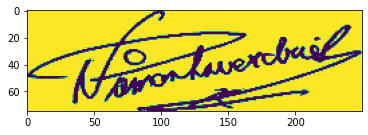

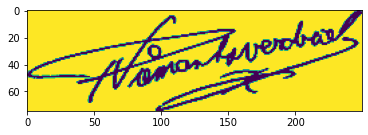

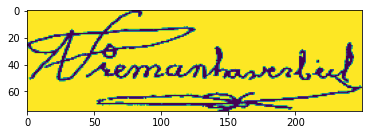

In [27]:
for i in [0,1,2]:
    plt.imshow(test_data[0][i])
    plt.show()

# New Section